In [3]:
#Adds higher directory to path, so we can access /ATS
import sys
sys.path.append("../")

from ATS.general import *
from ATS.QAQC import *

import pandas as pd

# Set the DataFram in pandas to show all columns and 1000 rows. Display plots inline
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 1000)

# Load and Subset Data

<Item title:"SAC_ERR_Wetlands_Monitoring" type:Feature Layer Collection owner:Anooshi>
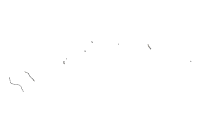

In [4]:
# Load data from arcGIS online
output = arcGIS_data_load('471fdaa7cf8441c4af222568aa42d5f5')

data = output['data0']
feature_service = output['feature_service']

In [5]:
# Subset by year
data.rename(columns={"SurveyDate": "Observation_Date"}, inplace=True)
sYear = input("Start Year? (YYYY)")
sub = year_subset(data, sYear)

Start Year? (YYYY) 2019

Analysis for 2019-10-01 07:00 UTC to 2020-10-01 07:00 UTC
ERROR: No Data in Subset


# QAQC

In [6]:
validate_domains(feature_service)



Table/Layer:  SAC_ERR_Wetlands_Monitoring


The following entries are not within the domain:


,Field,Data
0,Surveyor1,"{Janel Mayo, Russell Huddelston}"
0,Surveyor2,"{Janel Mayo, Ryan Swanson, Russell Huddelston}"
0,SubdominantPlantSpecies,{Nasturtium officinale}


In [7]:
QAQC_whitespace(data, exclude_cols=['Comments','ManagementActions'])

Name of Object ID Column:  ['OBJECTID']


Analysis for: Surveyor2
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: ArealExtentReview
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: InnundationVisible
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: BioticCrust
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: SaltCrust
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: DrySeasonHydrology
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: BHRSite
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: WaterStainedLeaves
No \xa0 ch

In [8]:
# QAQC Find blank entries
find_blank_entries(data, exclude_cols=['Disturbance','DrySeasonHydrology','SubdominantPlantCover', 'InundationSaturationDepth',
                                      'InundationSaturationDepth','SubdominantPlantSpecies_2',
                                      'SubdominantPlantSpecies','PercentBareGround','WetlandThreats','DominantPlantSpecies_2',
                                      'SubdominantPlantCover2','DominantPlantCover_2','DominantPlantCover','DominantPlantSpecies',
                                      'ManagementActions'])

No blank Surveyor2
No blank ArealExtentReview
No blank OBJECTID
No blank Shape__Length
No blank InnundationVisible
No blank BioticCrust
No blank SaltCrust
No blank BHRSite
No blank WaterStainedLeaves
No blank PresenceReducedIron
No blank RecentIronReduction
No blank HydrogenSulfide
No blank SurfaceWater
No blank Observation_Date
No blank AquaticInvertebrates
No blank CrayfishBurrows
No blank SHAPE
No blank SedimentDepositsRiverine
No blank FACNeutralTest
No blank SaturationVisible
No blank SurfaceSoilCracks
No blank DrainagePatterns
No blank OxidizedRhizospheres
No blank WetlandHydrology
No blank ThinMuckSurface
No blank WaterMarksRiverine
No blank Saturation
No blank DriftDeposits
No blank DriftDepositsRiverine
No blank WetlandID
No blank Shape__Area
No blank WetlandType
No blank HighWaterTable
No blank GlobalID
No blank ShallowAquitard
No blank Other
No blank SedimentDeposits
No blank Surveyor1
No blank DrySeasonWT
No blank WaterMarks
No blank Comments


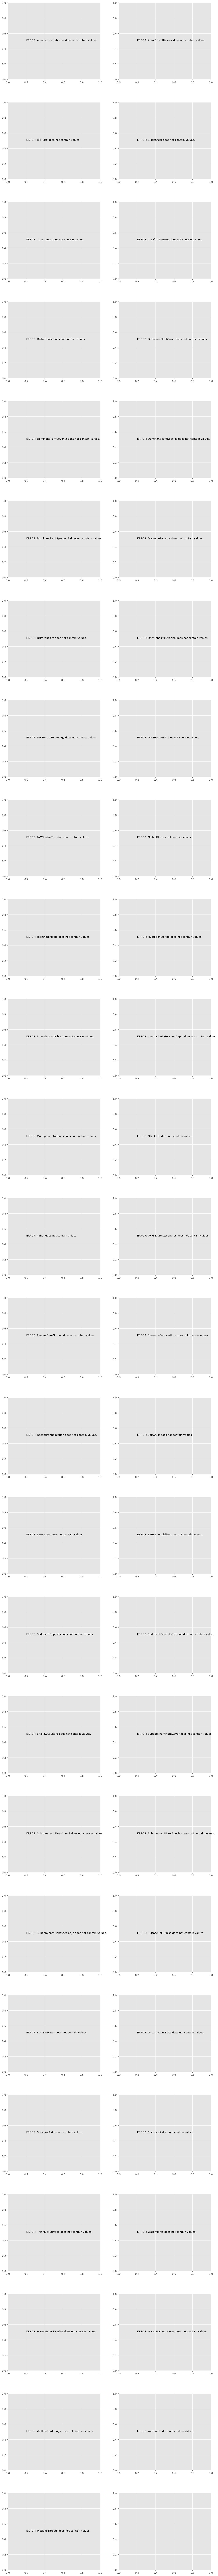

In [9]:
# histogram and pie charts for select columns
QAQC_plot(sub, ['AquaticInvertebrates', 'ArealExtentReview', 'BHRSite', 'BioticCrust',
       'Comments', 'CrayfishBurrows', 'Disturbance', 'DominantPlantCover',
       'DominantPlantCover_2', 'DominantPlantSpecies',
       'DominantPlantSpecies_2', 'DrainagePatterns', 'DriftDeposits',
       'DriftDepositsRiverine', 'DrySeasonHydrology', 'DrySeasonWT',
       'FACNeutralTest', 'GlobalID', 'HighWaterTable', 'HydrogenSulfide',
       'InnundationVisible', 'InundationSaturationDepth', 'ManagementActions',
       'OBJECTID', 'Other', 'OxidizedRhizospheres', 'PercentBareGround',
       'PresenceReducedIron', 'RecentIronReduction', 'SaltCrust',
       'Saturation', 'SaturationVisible', 'SedimentDeposits',
       'SedimentDepositsRiverine', 'ShallowAquitard',
       'SubdominantPlantCover', 'SubdominantPlantCover2',
       'SubdominantPlantSpecies', 'SubdominantPlantSpecies_2',
       'SurfaceSoilCracks', 'SurfaceWater', 'Observation_Date', 'Surveyor1', 'Surveyor2',
       'ThinMuckSurface', 'WaterMarks', 'WaterMarksRiverine',
       'WaterStainedLeaves', 'WetlandHydrology', 'WetlandID', 'WetlandThreats'])

In [12]:
QAQC_attachment_filenames(feature_service)


No mislabeled photos found for layer/table SAC_ERR_Wetlands_Monitoring


# Export Data Deliverable

In [10]:
field_order = [
'BHRSite',
'Observation_Date', 
'Surveyor1', 
'Surveyor2',
'WetlandID',
'WetlandType',
'ArealExtentReview',
'InundationSaturationDepth',   
'SurfaceWater',
'HighWaterTable',
'Saturation',
'WaterMarks',
'SedimentDeposits',
'DriftDeposits',
'SurfaceSoilCracks', 
'InnundationVisible',
'WaterStainedLeaves',
'SaltCrust',
'BioticCrust',
'AquaticInvertebrates',
'HydrogenSulfide',
'OxidizedRhizospheres',
'PresenceReducedIron',
'RecentIronReduction',
'ThinMuckSurface',
'Other',
'WaterMarksRiverine',
'SedimentDepositsRiverine',
'DriftDepositsRiverine',
'DrainagePatterns',
'DrySeasonWT',
'SaturationVisible',
'CrayfishBurrows', 
'ShallowAquitard',
'FACNeutralTest',
'WetlandHydrology',
'DrySeasonHydrology', 
'DominantPlantSpecies',
'DominantPlantCover',
'DominantPlantSpecies_2',
'DominantPlantCover_2', 
'SubdominantPlantSpecies',
'SubdominantPlantCover',
'SubdominantPlantSpecies_2',
'SubdominantPlantCover2',
'PercentBareGround',
'Disturbance', 
'WetlandThreats',
'ManagementActions', 
'Comments',
'OBJECTID',
'GlobalID', 
'SHAPE',
'Shape__Area',
'Shape__Length',
]

In [11]:
export_data_deliverable(data, feature_service, field_order )

No Related Table Found


Exported to Outputs/SAC_ERR_Wetlands_Monitoring_Data_20200720.xlsx
